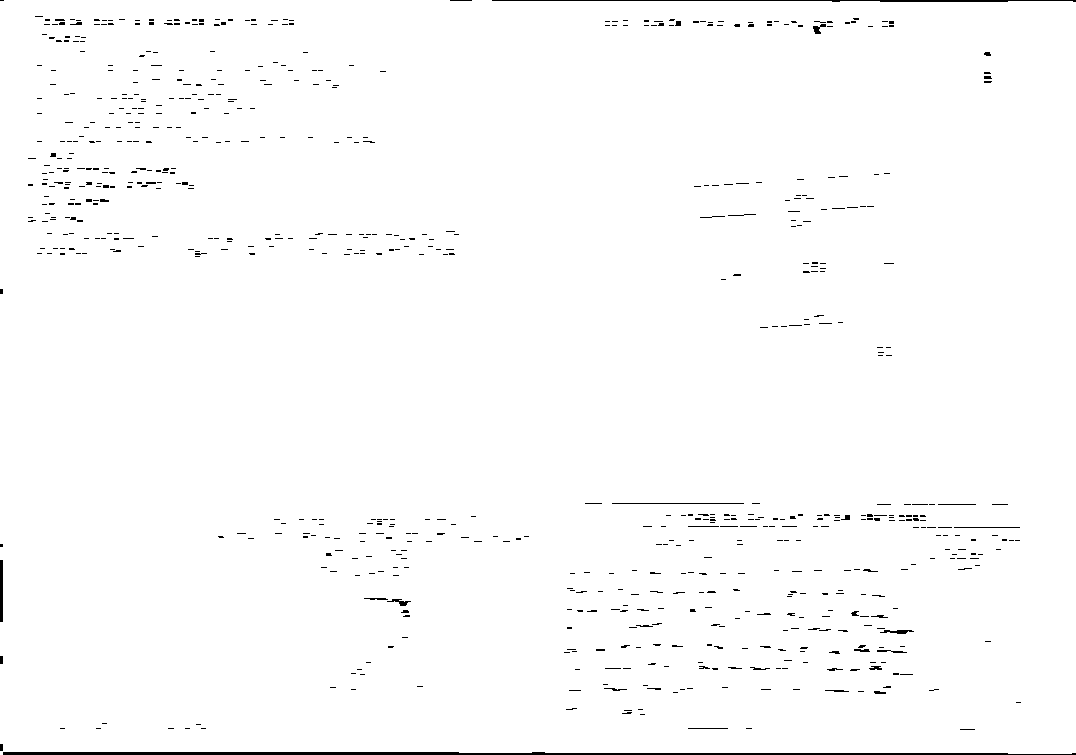

In [5]:
import cv2
import numpy as np
import math
from PIL import Image

# load image
img = cv2.imread('image1.png')
hh, ww = img.shape[:2]

# convert to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# threshold
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]

# use morphology to remove the thin lines
kernel = cv2.getStructuringElement(cv2.MORPH_RECT , (5,1))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# invert so that lines are white so that we can get contours for them
thresh_inv = 255 - thresh
cv2.imshow('thresh', thresh)
display(Image.fromarray(thresh))

# # get external contours
# contours = cv2.findContours(thresh_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# contours = contours[0] if len(contours) == 2 else contours[1]

# # keep contours whose bounding boxes are greater than 1/4 in each dimension
# # draw them as white on black background
# contour = np.zeros((hh,ww), dtype=np.uint8)
# for cntr in contours:
#     x,y,w,h = cv2.boundingRect(cntr)
#     if w > ww/4 and h > hh/4:
#         cv2.drawContours(contour, [cntr], 0, 255, 1)
        
# # get convex hull from  contour image white pixels
# points = np.column_stack(np.where(contour.transpose() > 0))
# hull_pts = cv2.convexHull(points)

# # draw hull on copy of input and on black background
# hull = img.copy()
# cv2.drawContours(hull, [hull_pts], 0, (0,255,0), 2)
# hull2 = np.zeros((hh,ww), dtype=np.uint8)
# cv2.drawContours(hull2, [hull_pts], 0, 255, 2)

# # get 4 corners from white hull points on black background
# num = 4
# quality = 0.001
# mindist = max(ww,hh) // 4
# corners = cv2.goodFeaturesToTrack(hull2, num, quality, mindist)
# corners = np.int0(corners)
# for corner in corners:
#     px,py = corner.ravel()
#     cv2.circle(hull, (px,py), 5, (0,0,255), -1)

# # get angles to each corner relative to centroid and store with x,y values in list
# # angles are clockwise between -180 and +180 with zero along positive X axis (to right)
# corner_info = []
# center = np.mean(corners, axis=0)
# centx = center.ravel()[0]
# centy = center.ravel()[1]
# for corner in corners:
#     px,py = corner.ravel()
#     dx = px - centx
#     dy = py - centy
#     angle = (180/math.pi) * math.atan2(dy,dx)
#     corner_info.append([px,py,angle])

# # function to define sort key as element 2 (i.e. angle)
# def takeThird(elem):
#     return elem[2]

# # sort corner_info on angle so result will be TL, TR, BR, BL order
# corner_info.sort(key=takeThird)

# # make conjugate control points
# # get input points from corners
# corner_list = []
# for x, y, angle in corner_info:
#     corner_list.append([x,y])
# print(corner_list)

# # define input points from (sorted) corner_list
# input = np.float32(corner_list)

# # define output points from dimensions of image, say half of input image
# width = ww // 2
# height = hh // 2
# output = np.float32([[0,0], [width-1,0], [width-1,height-1], [0,height-1]])

# # compute perspective matrix
# matrix = cv2.getPerspectiveTransform(input,output)

# # do perspective transformation setting area outside input to black
# result = cv2.warpPerspective(img, matrix, (width,height), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))

# # Display various images to see the steps
# cv2.imshow('thresh', thresh)
# cv2.imshow('contour', contour)
# cv2.imshow('hull', hull)
# cv2.imshow('result', result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()